<a href="https://colab.research.google.com/github/riyaa2001/ImageCartoonifier/blob/master/ImageCartoonifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import cv2
import numpy as np

from google.colab.patches import cv2_imshow
from google.colab import files

In [39]:
def read_file(ImagePath):
  image = cv2.imread(ImagePath)
  plt.imshow(image)
  return image

Saving shifan-hassan-Xp8uSaYajWU-unsplash.jpeg to shifan-hassan-Xp8uSaYajWU-unsplash.jpeg


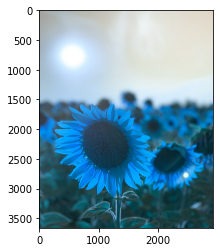

In [40]:
uploaded = files.upload()
ImagePath = next(iter(uploaded))
image = read_file(ImagePath)

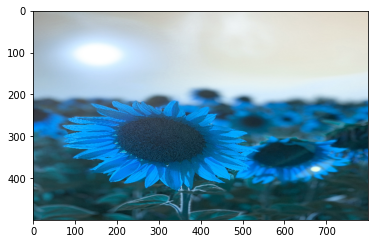

In [41]:
import matplotlib.pyplot as plt

resize = cv2.resize(image, (800,500))
plt.imshow(resize)

In [42]:
def edge_mask(resize, line_size, blur_value):
  gray = cv2.cvtColor(resize, cv2.COLOR_BGR2GRAY)
  gray_blur = cv2.medianBlur(gray, blur_value)
  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
  return edges

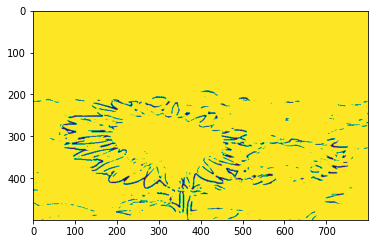

In [43]:
line_size = 7
blur_value = 7
edges = edge_mask(resize, line_size, blur_value)
plt.imshow(edges)

In [44]:
def color_quantization(resize, k):
  data = np.float32(resize).reshape((-1, 3))
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

  ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  result = center[label.flatten()]
  result = result.reshape(resize.shape)
  return result

In [45]:
total_color = 10
resize = color_quantization(resize, total_color)

In [48]:
blurred = cv2.bilateralFilter(resize, d=9, sigmaColor=100,sigmaSpace=100)

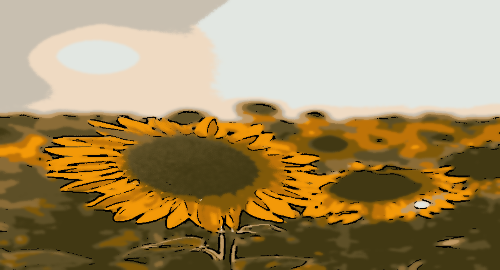

In [53]:
cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)
cartoon = cv2.resize(cartoon, (500, 270))
cv2_imshow(cartoon)